In [1]:
# Regression linéaire multiple

In [20]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [27]:
# Importer le dataset
dataset = pd.read_csv("Regression_Lineaire_Multiple/50_Startups.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [22]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\mmelo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

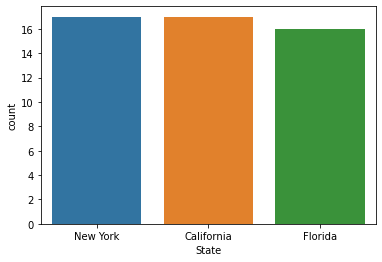

In [23]:
sns.countplot(dataset.State)

In [28]:
# Gérer les variables catégoriques
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:,3])
onehotencoder = OneHotEncoder()
country_onehot = onehotencoder.fit_transform(x).toarray()
x = x[:, 1:]

In [33]:
data = pd.get_dummies(dataset, columns= ["State"])

In [17]:
# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [44]:
X_train, X_test, y_train_, y_test_ = train_test_split(data.drop("Profit",axis = 1 ),
                                                       data['Profit'],
                                                       test_size = 0.2, 
                                                       random_state = 0)

In [45]:
X_train.shape

(40, 6)

In [46]:
y_train_.shape

(40,)

In [47]:
X_train

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0
7,130298.13,145530.06,323876.68,0,1,0
14,119943.24,156547.42,256512.92,0,1,0
45,1000.23,124153.04,1903.93,0,0,1
48,542.05,51743.15,0.00,0,0,1
29,65605.48,153032.06,107138.38,0,0,1


In [48]:
reg = LinearRegression()
reg.fit(X_train,y_train_)

LinearRegression()

In [58]:
resultat=reg.predict(X_test)

In [57]:
  reg.predict(np.array([[50000,14000,25000, 1, 0, 0]]))


In [18]:
# Construction du modèle
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [7]:
# Faire de nouvelles prédictions
y_pred = regressor.predict(x_test)

In [19]:
x_test

array([[182645.56, 118148.2, 1],
       [91790.61, 249744.55, 0],
       [110594.11, 229160.95, 1],
       [84710.77, 164470.71, 1],
       [101145.55, 407934.54, 1],
       [127864.55, 353183.81, 2],
       [65947.93, 185265.1, 2],
       [152701.92, 88218.23, 2],
       [122782.75, 303319.26, 1],
       [91391.77, 366168.42, 1]], dtype=object)

In [25]:
regressor.predict(np.array([[13000,34000,2],[12000,30000,1]]))

array([28080.67132272, 21802.37544887])

In [53]:
X_result = X_test.copy()

In [66]:
X_result["true_value"]= y_test_

In [67]:
X_result['Predicted']= resultat

In [68]:
X_result

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,True,Predicted,true_value
28,66051.52,182645.56,118148.20,0,1,0,103282.38,103015.201598,103282.38
11,100671.96,91790.61,249744.55,1,0,0,144259.40,132582.277608,144259.40
10,101913.08,110594.11,229160.95,0,1,0,146121.95,132447.738452,146121.95
41,27892.92,84710.77,164470.71,0,1,0,77798.83,71976.098513,77798.83
2,153441.51,101145.55,407934.54,0,1,0,191050.39,178537.482211,191050.39
27,72107.60,127864.55,353183.81,0,0,1,105008.31,116161.242302,105008.31
38,20229.59,65947.93,185265.10,0,0,1,81229.06,67851.692097,81229.06
31,61136.38,152701.92,88218.23,0,0,1,97483.56,98791.733747,97483.56
22,73994.56,122782.75,303319.26,0,1,0,110352.25,113969.435330,110352.25
4,142107.34,91391.77,366168.42,0,1,0,166187.94,167921.065696,166187.94


<AxesSubplot:xlabel='Administration', ylabel='true_value'>

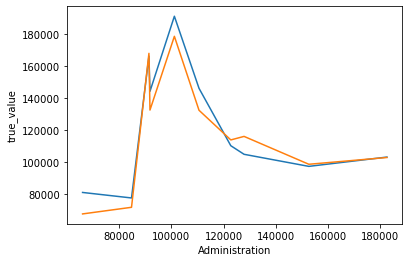

In [76]:
sns.lineplot(y=X_result.true_value,x= X_result.Administration)
sns.lineplot(y= X_result.Predicted, x= X_result.Administration )